In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import tqdm.notebook as tqdm

from pathlib import Path

%matplotlib inline


import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D

In [2]:
DATA_DIR_PATH = "../data/bengali_AI_handwritten_grapheme_classification"

IMG_HEIGHT = 137
IMG_WIDTH = 236

ROOT_CLASSES_NUM = 168
CONSONANT_CLASSES_NUM = 7
VOWEL_CLASSES_NUM = 11

In [3]:
train_df = pd.read_csv("{}/train.csv".format(DATA_DIR_PATH))
test_df = pd.read_csv("{}/test.csv".format(DATA_DIR_PATH))
class_map_df = pd.read_csv("{}/class_map.csv".format(DATA_DIR_PATH))
sample_submission_df = pd.read_csv("{}/sample_submission.csv".format(DATA_DIR_PATH))

In [4]:
sample_submission_df

,row_id,target
0,Test_0_consonant_diacritic,0
1,Test_0_grapheme_root,0
2,Test_0_vowel_diacritic,0
3,Test_1_consonant_diacritic,0
4,Test_1_grapheme_root,0
5,Test_1_vowel_diacritic,0
6,Test_2_consonant_diacritic,0
7,Test_2_grapheme_root,0
8,Test_2_vowel_diacritic,0
9,Test_3_consonant_diacritic,0


In [5]:
class_map_df

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই
...,...,...,...
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র


In [6]:
train_df

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো
...,...,...,...,...,...
200835,Train_200835,22,7,2,র্খে
200836,Train_200836,65,9,0,ত্তো
200837,Train_200837,2,1,4,অ্যা
200838,Train_200838,152,9,0,স্নো


In [7]:
test_df

,row_id,image_id,component
0,Test_0_consonant_diacritic,Test_0,consonant_diacritic
1,Test_0_grapheme_root,Test_0,grapheme_root
2,Test_0_vowel_diacritic,Test_0,vowel_diacritic
3,Test_1_consonant_diacritic,Test_1,consonant_diacritic
4,Test_1_grapheme_root,Test_1,grapheme_root
5,Test_1_vowel_diacritic,Test_1,vowel_diacritic
6,Test_2_consonant_diacritic,Test_2,consonant_diacritic
7,Test_2_grapheme_root,Test_2,grapheme_root
8,Test_2_vowel_diacritic,Test_2,vowel_diacritic
9,Test_3_consonant_diacritic,Test_3,consonant_diacritic


In [8]:
def read_parquet_data(dir_path: str, num_file: int, data_type: str) -> list:
    df_list = list()
    data_type = data_type.lower()
    
    for i in range(num_file):
        df = pd.read_parquet("{}/{}_image_data_{}.parquet".format(dir_path, data_type, i))
        df.set_index('image_id', inplace=True)
        df_list.append(df)
        
        print("Reading {} th parquet file is done".format(i))
    
    return df_list

In [9]:
# train_df_list = read_parquet_data(dir_path=DATA_DIR_PATH, num_file=4, data_type="train")
train_df_list = read_parquet_data(dir_path=DATA_DIR_PATH, num_file=1, data_type="train")

Reading 0 th parquet file is done


/usr/local/lib/python3.6/dist-packages/pyarrow/pandas_compat.py:707: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/usr/local/lib/python3.6/dist-packages/pyarrow/pandas_compat.py:734: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/usr/local/lib/python3.6/dist-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [10]:
test_df_list = read_parquet_data(dir_path=DATA_DIR_PATH, num_file=4, data_type="test")

Reading 0 th parquet file is done
Reading 1 th parquet file is done
Reading 2 th parquet file is done
Reading 3 th parquet file is done


In [13]:
def reshape_img(img_data):
    if isinstance(img_data, pd.Series):
        img_data = img_data.to_numpy()
    
    return img_data.reshape(IMG_HEIGHT, IMG_WIDTH)

In [14]:
def show_img(img):
    fig = plt.figure(figsize=(15, 7))
    plt.xticks(range(0, IMG_WIDTH, 10))
    plt.yticks(range(0, IMG_HEIGHT, 5))
    plt.imshow(img, cmap='gray')
    plt.show()

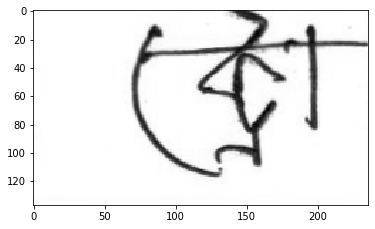

In [30]:
show_img(reshape_img(train_df_list[0].iloc[0]))

In [17]:
img_name_list = list(train_df_list[0].index)

In [18]:
img_name_list

['Train_0',
 'Train_1',
 'Train_2',
 'Train_3',
 'Train_4',
 'Train_5',
 'Train_6',
 'Train_7',
 'Train_8',
 'Train_9',
 'Train_10',
 'Train_11',
 'Train_12',
 'Train_13',
 'Train_14',
 'Train_15',
 'Train_16',
 'Train_17',
 'Train_18',
 'Train_19',
 'Train_20',
 'Train_21',
 'Train_22',
 'Train_23',
 'Train_24',
 'Train_25',
 'Train_26',
 'Train_27',
 'Train_28',
 'Train_29',
 'Train_30',
 'Train_31',
 'Train_32',
 'Train_33',
 'Train_34',
 'Train_35',
 'Train_36',
 'Train_37',
 'Train_38',
 'Train_39',
 'Train_40',
 'Train_41',
 'Train_42',
 'Train_43',
 'Train_44',
 'Train_45',
 'Train_46',
 'Train_47',
 'Train_48',
 'Train_49',
 'Train_50',
 'Train_51',
 'Train_52',
 'Train_53',
 'Train_54',
 'Train_55',
 'Train_56',
 'Train_57',
 'Train_58',
 'Train_59',
 'Train_60',
 'Train_61',
 'Train_62',
 'Train_63',
 'Train_64',
 'Train_65',
 'Train_66',
 'Train_67',
 'Train_68',
 'Train_69',
 'Train_70',
 'Train_71',
 'Train_72',
 'Train_73',
 'Train_74',
 'Train_75',
 'Train_76',
 'Train_7

In [19]:
def get_class_dict(class_map_df: pd.DataFrame) -> dict:
    class_dict = dict()

    for component_type in set(class_map_df['component_type']):
        output_df = class_map_df[class_map_df['component_type'] == component_type]
        output_df.drop('component_type', axis=1, inplace=True)
        output_df.index = output_df['label']

        class_dict[component_type] = output_df

    return class_dict

In [20]:
class_dict = get_class_dict(class_map_df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
class_dict.keys()

dict_keys(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic'])

In [22]:
print(len(class_dict['consonant_diacritic']))
class_dict['consonant_diacritic']

7


,label,component
label,,
0,0,0
1,1,ঁ
2,2,র্
3,3,র্য
4,4,্য
5,5,্র
6,6,্র্য


In [23]:
print(len(class_dict['grapheme_root']))
class_dict['grapheme_root']

168


,label,component
label,,
0,0,ং
1,1,ঃ
2,2,অ
3,3,আ
4,4,ই
...,...,...
163,163,হ্ল
164,164,ৎ
165,165,ড়


In [24]:
print(len(class_dict['vowel_diacritic']))
class_dict['vowel_diacritic']

11


,label,component
label,,
0,0,0
1,1,া
2,2,ি
3,3,ী
4,4,ু
5,5,ূ
6,6,ৃ
7,7,ে
8,8,ৈ


In [15]:
def inverse_image(img, threshhold=10):
    img = img.astype(np.int64)

    mask = np.ones_like(img, dtype=np.int64) * 255
    img = abs(img - mask)
    
    img[img < threshhold] = 0

#     for idx, value in enumerate(img):
#         if value < threshhold:
#             img[idx] = 0
    
    return img

In [16]:
def num_range(data) :
    # len_d =  len(data)
    
    cut_image = np.array([])
    max_x = 0
    max_y = 0
    len_d = 0
    
    for i in data :
        x1 = 0
        y1 = 0
        x2 = 0
        y2 = 0
        for j in range(0,IMG_HEIGHT) :
            for k in range(0,IMG_WIDTH) :
                # x1 init
                if i[j][k] > 0 and x1 == 0 :
                    x1 = k
                # y1 init
                if i[j][k] > 0 and y1 == 0 :
                    y1 = j

                # x1 update
                if i[j][k] >0 and k < x1 :
                    x1 = k
                # y1 update
                if i[j][k] >0 and j < y1 :
                    y1 = j
                # x2 update
                if i[j][k] > 0 and x1 != 0 and k > x2 :
                    x2 = k
                # y2 update
                if i[j][k] > 0 and y1 != 0 and j > y2 :
                    y2 = j

        # center_X = int((x1+x2)/2)
        # center_Y = int((y1+y2)/2)

        # x_size = int((x2-x1)/2)
        # y_size = int((y2-y1)/2)

        image_set = [x1, x2, y1, y2]
        # mini_image = np.array(i[center_Y-y_size : center_Y+y_size + 1, center_X-x_size : center_X+x_size + 1])
        # image_set = np.array([mini_image, x2-x1, y2-y1])

        if x2-x1+1 > max_x :
            max_x = x2-x1+1
        if y2-y1+1 > max_y :
            max_y = y2-y1+1

        cut_image = np.append(cut_image, image_set,axis=0)
#         if len_d %999 == 0 :
#             print(cut_image.shape)
        len_d += 1

    # if max_x > max_y :
    #   max_size = max_x
    # else :
    #   max_size = max_y
    cut_image = cut_image.reshape(-1,4)
    return cut_image # max_size

In [17]:
def pad_image(data, cut_image) :
    padding_img = np.array([])
    center_size_x = IMG_WIDTH//2
    center_size_y = IMG_HEIGHT//2
    # for i in range(1) :
    for i in range(len(cut_image)) :
        init = np.zeros((137,236))
        # init.fill(255)
        # print(cut_image[i][0], cut_image[i][1],cut_image[i][2],cut_image[i][3])
        x_size = int((cut_image[i][1]-cut_image[i][0])/2)
        y_size = int((cut_image[i][3]-cut_image[i][2])/2)
        data_center_X = int((cut_image[i][0]+cut_image[i][1])/2)
        data_center_Y = int((cut_image[i][2]+cut_image[i][3])/2)

        # init[center_size-y_size:center_size+y_size+1, center_size-x_size:center_size+x_size+1] = data[i][data_center_Y-y_size:data_center_Y+y_size+1, data_center_X-x_size:data_center_X+x_size+1]
        init[center_size_y-y_size:center_size_y+y_size+1, center_size_x-x_size:center_size_x+x_size+1] \
        = data[i][data_center_Y-y_size:data_center_Y+y_size+1, data_center_X-x_size:data_center_X+x_size+1]
        # show(data[i][data_center_Y-y_size:data_center_Y+y_size+1, data_center_X-x_size:data_center_X+x_size+1])
        # if i == 0 :
        #   show(data[i][data_center_Y-y_size:data_center_Y+y_size+1, data_center_X-x_size:data_center_X+x_size+1])
        padding_img = np.append(padding_img,init)

    padding_img = padding_img.reshape(-1,137,236)
    return padding_img

In [18]:
CENTERED_IMAGE_PATH = "../data/bengali_centered"

In [38]:
def save_centered_image(img_df):
    Path(CENTERED_IMAGE_PATH).mkdir(parents=True, exist_ok=True)
    
    for image_name, row in tqdm.tqdm(img_df.iterrows(), total=img_df.shape[0]):
        img = inverse_image(row, threshhold=50)
        img = img.to_numpy()
        img = img.reshape(-1, IMG_HEIGHT, IMG_WIDTH)
        
        cut_image = num_range(img)
        pad_img = pad_image(img, cut_image)
        
        plt.imsave(os.path.join(CENTERED_IMAGE_PATH, "{}.jpg".format(image_name)), pad_img[0], cmap='gray')

In [22]:
def check_centered_image(row):
    Path(CENTERED_IMAGE_PATH).mkdir(parents=True, exist_ok=True)
    
#     for image_name, row in tqdm.tqdm(img_df.iterrows(), total=img_df.shape[0]):
    img = inverse_image(row, threshhold=50)
    img = img.to_numpy()
    img = img.reshape(-1, IMG_HEIGHT, IMG_WIDTH)

    cut_image = num_range(img)
    print("cropped image position: ", cut_image)
    pad_img = pad_image(img, cut_image)

    return pad_img

In [21]:
train_df_list[0].iloc[0]

0        254
1        253
2        252
3        253
4        251
        ... 
32327    253
32328    253
32329    253
32330    253
32331    251
Name: Train_0, Length: 32332, dtype: uint8

In [44]:
save_centered_image(train_df_list[0])

KeyboardInterrupt: 

In [ ]:
save_centered_image(train_df_list[1])

In [ ]:
save_centered_image(train_df_list[2])

In [ ]:
save_centered_image(train_df_list[3])

In [91]:
train_df.iloc[112]

image_id               Train_112
grapheme_root                123
vowel_diacritic                0
consonant_diacritic            0
grapheme                       র
Name: 112, dtype: object

In [ ]:
"""
Crop 잘 안 된 것

3237
2248

선만 있는것(글자 사라짐)
199
2984

글자랑 오타랑 헷갈린 것
112 - 얘는 점이 아니라 글자의 일부임

버리자
2337

글자가 65
2510
"""

In [61]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture

### Gaussian Mixture

In [76]:
gm = GaussianMixture(n_components=2)

In [73]:
clusting_test_data = reshape_img(train_df_list[0].iloc[3326]).flatten().reshape(-1, 1)

In [74]:
clusting_test_data

array([[244],
       [241],
       [250],
       ...,
       [255],
       [255],
       [255]], dtype=uint8)

In [77]:
gm.fit(clusting_test_data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [84]:
pred = gm.predict(clusting_test_data)

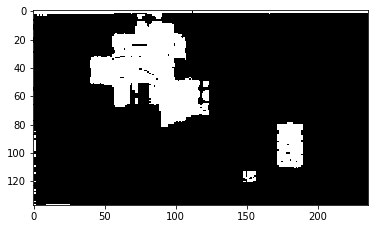

In [88]:
show_img(pred.reshape(137, 236))

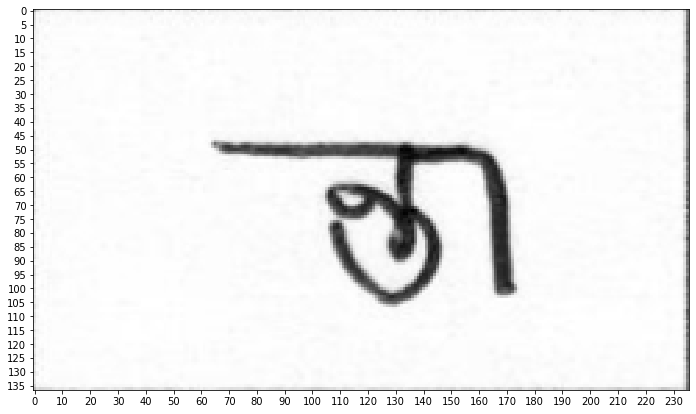

In [104]:
show_img(reshape_img(train_df_list[0].iloc[199]))

In [128]:
centered_img_path = "../data/bengali_centered/"
img = plt.imread(centered_img_path + "Train_199.jpg")

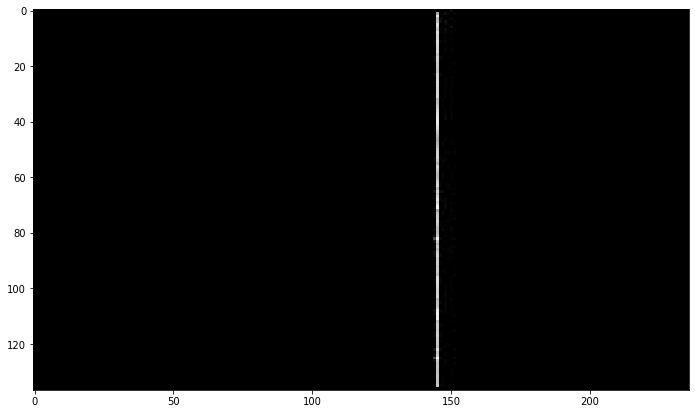

In [131]:
plt.figure(figsize=(15, 7))
plt.imshow(img)
plt.show()

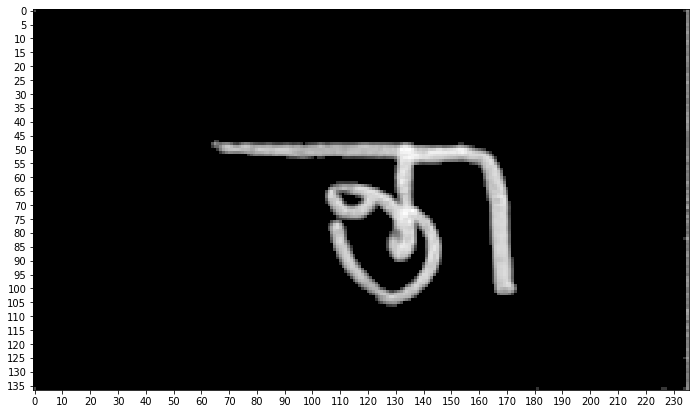

In [134]:
show_img(inverse_image(train_df_list[0].iloc[199], threshhold=50).to_numpy().reshape(IMG_HEIGHT, -1))[:, ]

In [26]:
pad_img = check_centered_image(train_df_list[0].iloc[199])

cropped image position:  [[181. 235.   1. 136.]]


In [36]:
centered_img_path = "../data/bengali_centered/"
img = plt.imread(centered_img_path + "Train_2984.jpg")

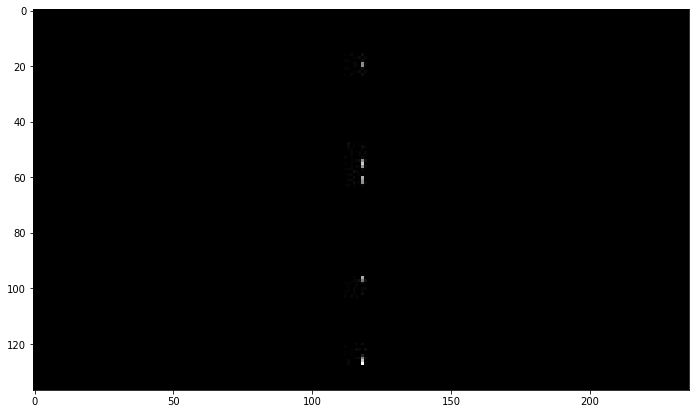

In [37]:
plt.figure(figsize=(15, 7))
plt.imshow(img)
plt.show()

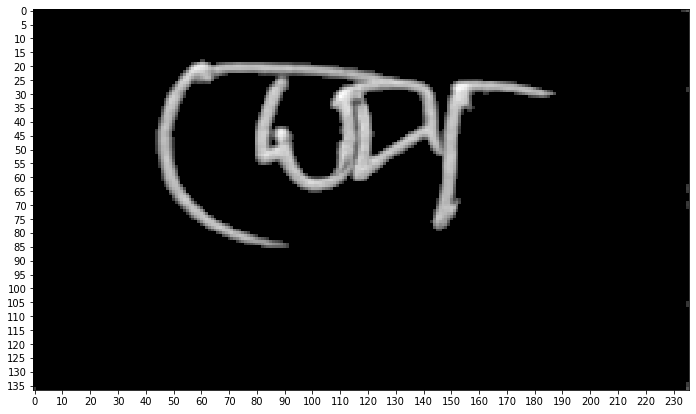

In [39]:
show_img(inverse_image(train_df_list[0].iloc[2984], threshhold=50).to_numpy().reshape(IMG_HEIGHT, -1))

In [40]:
pad_img = check_centered_image(train_df_list[0].iloc[2984])

cropped image position:  [[235. 235.  18. 136.]]


In [28]:
pad_img.shape

(1, 137, 236)

In [35]:
inverse_image(train_df_list[0].iloc[199], threshhold=50).to_numpy().reshape(IMG_HEIGHT, -1)[:, 181]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       50])

In [29]:
reshape_img(train_df_list[0].iloc[199])[:, 181]

array([236, 247, 249, 245, 249, 253, 255, 254, 252, 251, 252, 253, 254,
       254, 253, 252, 252, 253, 253, 254, 254, 254, 252, 253, 254, 253,
       251, 251, 253, 254, 254, 253, 253, 252, 252, 253, 254, 255, 254,
       253, 254, 255, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 253, 253, 253, 253, 254, 254, 254, 253, 253, 252,
       252, 252, 253, 253, 253, 253, 253, 253, 254, 253, 253, 252, 252,
       251, 251, 251, 251, 251, 252, 253, 253, 252, 252, 251, 252, 251,
       250, 252, 253, 252, 250, 250, 251, 252, 250, 252, 253, 252, 253,
       254, 253, 250, 249, 251, 252, 253, 253, 255, 253, 251, 252, 254,
       254, 253, 253, 253, 252, 252, 251, 251, 251, 251, 250, 252, 252,
       252, 254, 254, 253, 248, 241, 205], dtype=uint8)